Project - Singapore Housing Data
---

Part 2: EDA and feature engineering 
---

In [219]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
#load the cleaned file from previous codebook
df=pd.read_csv("../data/cleaned.csv",low_memory=False)
df.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,90.0,Model A,2006,680000.0,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,130.0,Improved,1987,665000.0,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,144.0,Apartment,1997,838000.0,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,103.0,Model A,1992,550000.0,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,83.0,Simplified,1987,298000.0,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


- we want to do EDA. Therefore, need to set the time format

In [221]:
df['Tranc_YearMonth'] = pd.to_datetime(df['Tranc_YearMonth'], yearfirst=True)

#select the numeric columns and run a corr() plot.

***Let's look at the hdb prices***

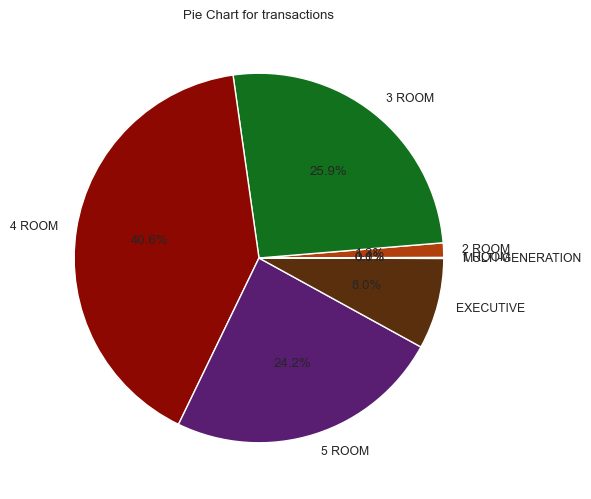

In [222]:
d = df.groupby('flat_type')['resale_price'].count().reset_index()
d.columns = ['flat_type', 'counts']
plt.figure(figsize=(6,6))
sns.set_palette('dark')
plt.pie(d['counts'], labels=d['flat_type'], autopct='%1.1f%%')
plt.title('Pie Chart for transactions')

plt.savefig('../data/output/images/pie_chart_nubmer_of_trans.png')
plt.show()

- comment:
- larger proportions of transactions are in 4-room flat, followed by 3-room and 5-room flats, respectively.

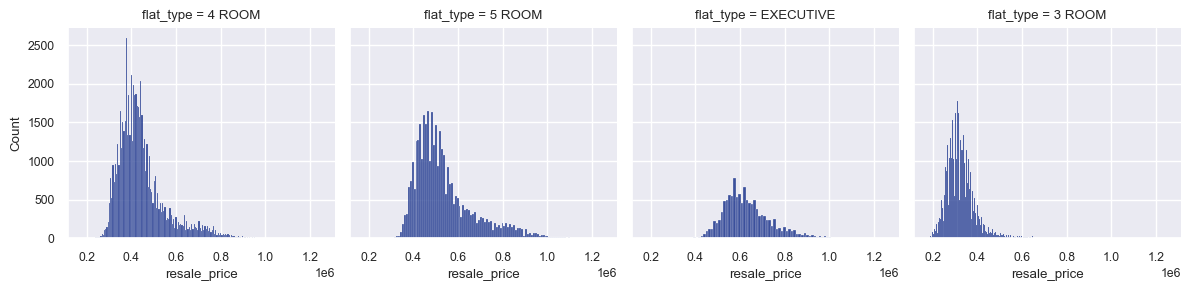

In [223]:
#in this plot, we would like to check the resale-price distribution split by the flat-type

g = sns.FacetGrid(data=df[df['flat_type'].isin(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM'])], col = 'flat_type')

g.map(sns.histplot, 'resale_price')
plt.savefig('../data/output/images/histoplotofnumerofsales.png')

plt.show()


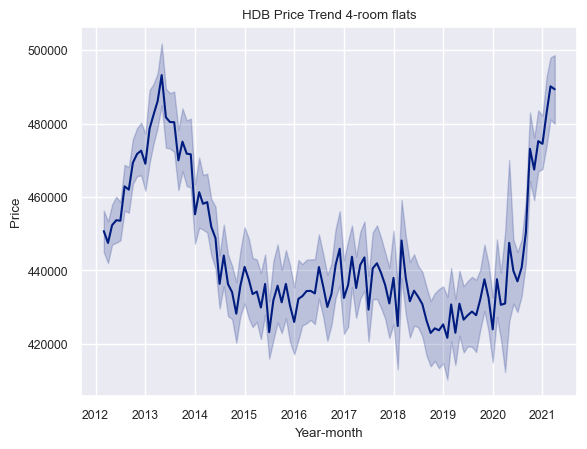

,id,Tranc_YearMonth,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,90.0,Model A,2006,680000.0,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,103.0,Model A,1992,550000.0,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,83.0,Simplified,1987,298000.0,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
10,90310,2013-06-01,SENGKANG,4 ROOM,273D,COMPASSVALE LINK,90.0,Premium Apartment,2009,625000.0,...,79,0,1.382893,103.895854,490.102280,Seng Kang Secondary School,199,0,1.386099,103.898393
13,52757,2015-08-01,BUKIT MERAH,4 ROOM,54,HAVELOCK RD,94.0,Model A,2013,770000.0,...,54,0,1.291299,103.823941,611.944312,Gan Eng Seng School,223,0,1.289071,103.823734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150609,149220,2018-09-01,BUKIT PANJANG,4 ROOM,633B,SENJA RD,93.0,Model A,2013,450000.0,...,64,0,1.383591,103.760289,343.787864,West Spring Secondary School,220,0,1.387804,103.760148
150611,94196,2016-09-01,CLEMENTI,4 ROOM,708,CLEMENTI WEST ST 2,92.0,New Generation,1980,395000.0,...,69,0,1.312622,103.757030,574.271220,Kent Ridge Secondary School,206,0,1.301353,103.764927
150612,56385,2015-12-01,PUNGGOL,4 ROOM,603C,PUNGGOL RD,92.0,Model A,2012,450000.0,...,68,0,1.400298,103.907431,185.251062,Punggol Secondary School,194,0,1.402126,103.909119
150616,121770,2019-03-01,TOA PAYOH,4 ROOM,155,LOR 1 TOA PAYOH,101.0,Model A,1999,779000.0,...,42,1,1.332818,103.841918,321.111484,CHIJ Secondary,243,0,1.332462,103.842719


In [224]:
#plot price trend
data_4room_df = df[df['flat_type']=='4 ROOM']
data_4room_df

# Create a line chart
sns.lineplot(x=data_4room_df['Tranc_YearMonth'], y=data_4room_df['resale_price'])

# Add labels and title
plt.title('HDB Price Trend 4-room flats')
plt.xlabel('Year-month')
plt.ylabel('Price')

# Show the chart
plt.savefig('../data/output/images/trendchart_4room_flat.png')
plt.show()

data_4room_df

- comment: It is clear from the trendchart that the price is driven by market conditions across the years.

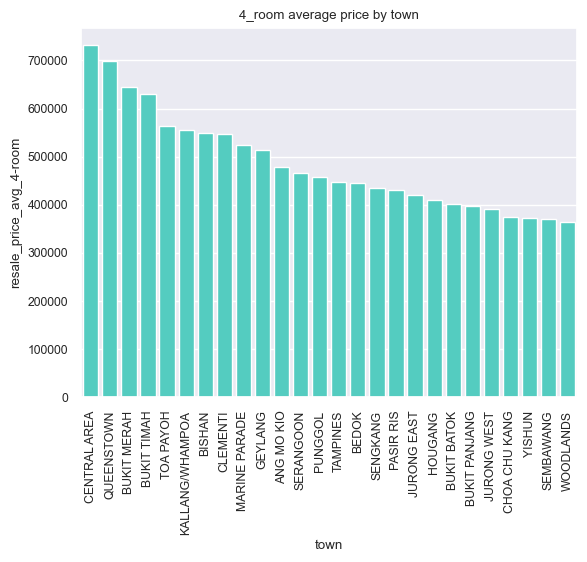

,town,resale_price
7,CENTRAL AREA,731433.968815
18,QUEENSTOWN,698598.381021
4,BUKIT MERAH,645159.385090
6,BUKIT TIMAH,629276.765625
23,TOA PAYOH,564466.272161
14,KALLANG/WHAMPOA,554815.284223
2,BISHAN,550053.566438
9,CLEMENTI,547137.061578
15,MARINE PARADE,523293.773663
10,GEYLANG,513588.804249


In [225]:
#4-room flat by town
data4 = data_4room_df.groupby('town')['resale_price'].mean().reset_index()

data4.sort_values(by='resale_price', inplace=True, ascending=False)
#data4_df.dtypes
data4

# Create a bar chart using seaborn
sns.barplot(x ='town', y = 'resale_price', data = data4, color ='Turquoise' )

# Add title and axis labels
plt.title('4_room average price by town')
plt.xlabel('town')
plt.ylabel('resale_price_avg_4-room')
plt.xticks(rotation=90)

# Show the plot
plt.savefig('../data/output/images/barchartbytown_4room_flat.png')
plt.show()
data4

- Comment: The key feature of a house price is the location. We can see that the price varies up to ~365 just by the location difference.

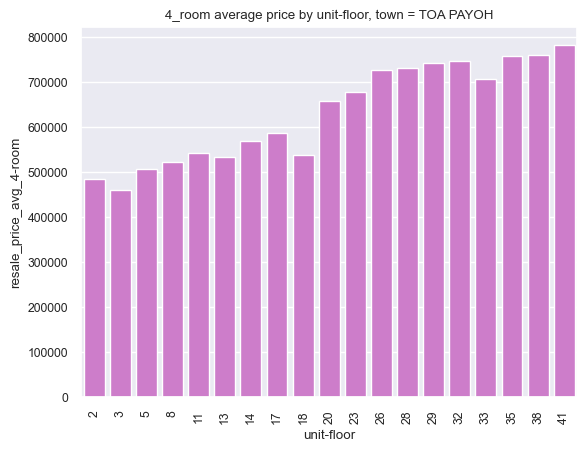

In [226]:
#let's look at the influence of floor on a 4-room hdb.

data4_amk = data_4room_df[data_4room_df['town'] == 'TOA PAYOH'].groupby('mid_storey')['resale_price'].mean().reset_index()
data4_amk.sort_values(by='resale_price', inplace=True, ascending=False)

# Create a bar chart using seaborn
sns.barplot(x ='mid_storey', y = 'resale_price', data = data4_amk, color ='orchid')

# Add title and axis labels
plt.title('4_room average price by unit-floor, town = TOA PAYOH')
plt.xlabel('unit-floor')
plt.ylabel('resale_price_avg_4-room')
plt.xticks(rotation=90)

# Show the plot
plt.savefig('../data/output/images/barchart_by_floor_4room_flat.png')
plt.show()


- comments: 
- To check the influence of floor price, we limit our analysis to Town = TOA PAYOH, 4-room flat.
- Price variation is significant among the floors. ranging from 500k to 750k which is quite significant 

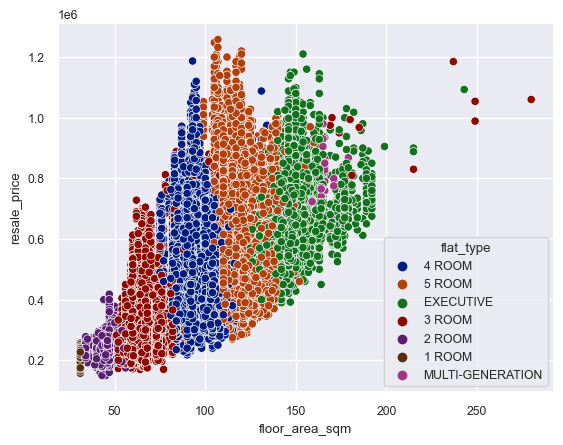

In [247]:
#scatterplot to show price vs house area.
sns.scatterplot(data=df, y= 'resale_price', x='floor_area_sqm', hue = 'flat_type')
plt.savefig('../data/output/images/pricevs_floor_size.png')


In [227]:
df[['full_flat_type', 'flat_model', 'flat_type']]

,full_flat_type,flat_model,flat_type
0,4 ROOM Model A,Model A,4 ROOM
1,5 ROOM Improved,Improved,5 ROOM
2,EXECUTIVE Apartment,Apartment,EXECUTIVE
3,4 ROOM Model A,Model A,4 ROOM
4,4 ROOM Simplified,Simplified,4 ROOM
...,...,...,...
150629,EXECUTIVE Apartment,Apartment,EXECUTIVE
150630,5 ROOM Improved,Improved,5 ROOM
150631,EXECUTIVE Apartment,Apartment,EXECUTIVE
150632,3 ROOM Improved,Improved,3 ROOM


In [228]:
df.drop(['flat_model', 'flat_type'], axis=1, inplace = True)

In [229]:
df_selected_numeric_columns = df.select_dtypes(exclude =['object']).columns
df_selected_numeric_columns
# df_selected_numeric_columns.remove('id')

Index(['id', 'Tranc_YearMonth', 'floor_area_sqm', 'lease_commence_date',
       'resale_price', 'Tranc_Year', 'Tranc_Month', 'mid_storey', 'hdb_age',
       'max_floor_lvl', 'year_completed', 'commercial', 'market_hawker',
       'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental', 'Latitude',
       'Longitude', 'Mall_Nearest_Distance', 'Mall_Within_500m',
       'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Nearest_Distance',
       'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_latitude', 'bus_stop_longitude',
       'pri_sch_nearest_distance'

In [230]:
df.select_dtypes(exclude =['object'])

,id,Tranc_YearMonth,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,hdb_age,max_floor_lvl,...,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05-01,90.0,2006,680000.0,2016,5,11,15,25,...,1138.633422,78,1,1.317659,103.882504,1138.633422,224,0,1.317659,103.882504
1,122598,2012-07-01,130.0,1987,665000.0,2012,7,8,34,9,...,415.607357,45,1,1.349783,103.854529,447.894399,232,0,1.350110,103.854892
2,170897,2013-07-01,144.0,1997,838000.0,2013,7,14,24,16,...,498.849039,39,0,1.345245,103.756265,180.074558,188,0,1.342334,103.760013
3,86070,2012-04-01,103.0,1992,550000.0,2012,4,3,29,11,...,389.515528,20,1,1.354789,103.844934,389.515528,253,1,1.354789,103.844934
4,153632,2017-12-01,83.0,1987,298000.0,2017,12,2,34,4,...,401.200584,74,0,1.416280,103.838798,312.025435,208,0,1.414888,103.838335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,39814,2020-09-01,161.0,1995,625000.0,2020,9,5,26,12,...,418.983965,43,0,1.444148,103.794545,189.889876,224,0,1.441221,103.793772
150630,147177,2017-06-01,110.0,2001,455000.0,2017,6,5,20,16,...,136.298080,45,0,1.339244,103.698896,614.418470,188,0,1.343224,103.701703
150631,179087,2020-12-01,144.0,1993,733000.0,2020,12,11,28,15,...,512.626814,43,1,1.328471,103.901299,556.889910,188,0,1.327520,103.901811
150632,21309,2016-05-01,59.0,1974,338000.0,2016,5,8,47,10,...,787.250957,82,0,1.299811,103.799965,832.386515,214,0,1.300475,103.801724


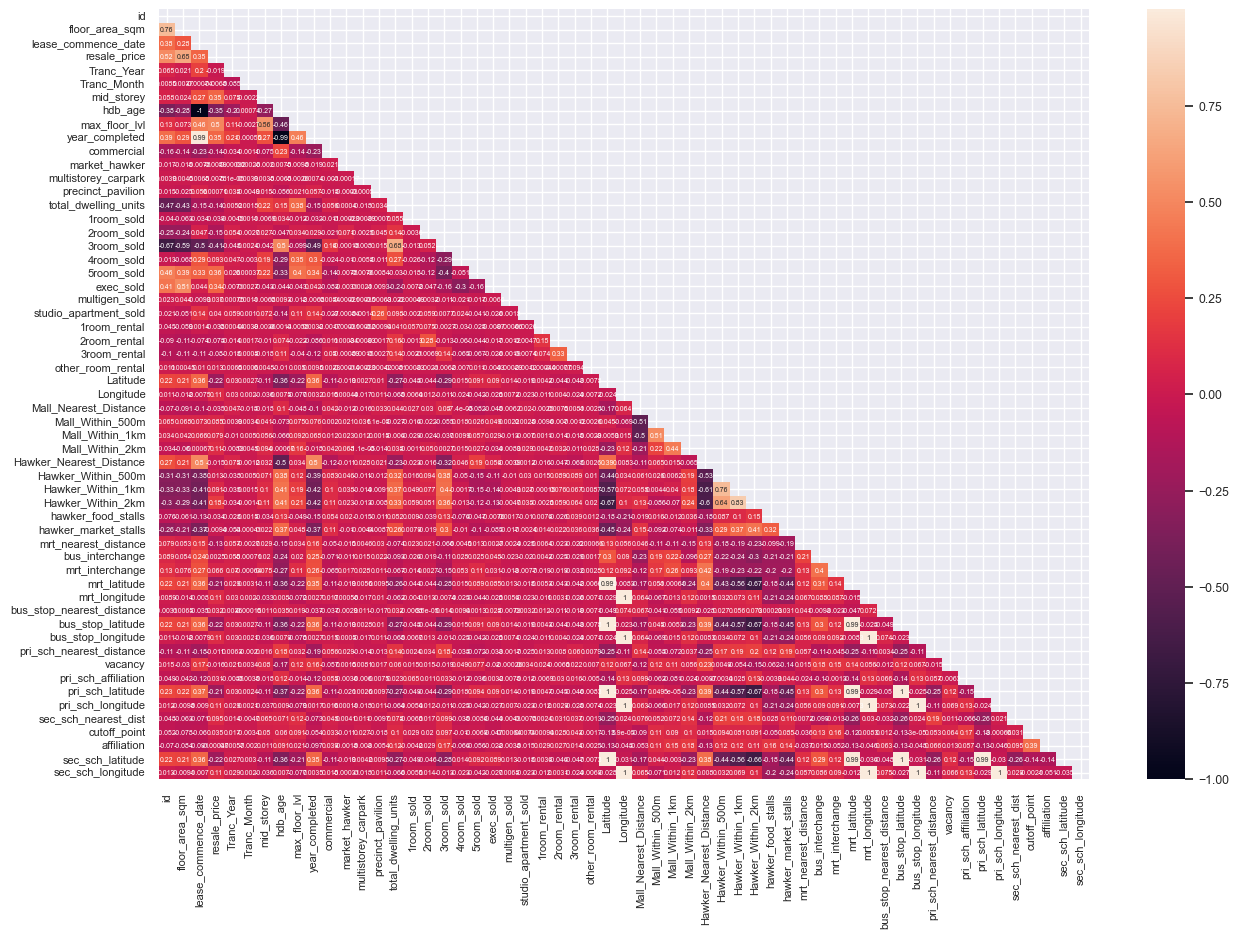

In [231]:

numeric_cols = df.select_dtypes(exclude=['object']).columns
data2 = df[numeric_cols].corr(numeric_only=True)

# Create a mask to hide the upper triangle of the plot
mask = np.zeros_like(data2)
mask[np.triu_indices_from(mask)] = True

fig = plt.subplots(figsize=(15,10))

# Create a correlation plot with the mask
sns.heatmap(data2, mask=mask, annot=True, annot_kws={"size":5} )

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);
# Show the plot
plt.show()


In [232]:
df.dtypes.value_counts()

int64             33
float64           24
object            11
datetime64[ns]     1
dtype: int64

some of the parameters have correlation = 1. we can drop those parameters.
- co-ordinates are similar to interested points here. And not directly used for the fitting in the future. The distance is the correlatin parameter.

In [233]:
columns_to_drop = ['Latitude', 'Longitude', 'mrt_latitude', 'mrt_longitude', 'mrt_latitude', 'mrt_longitude','bus_stop_latitude', 'bus_stop_longitude',
'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude', 'year_completed']

In [234]:
df.shape

(150634, 69)

In [235]:
df.drop(columns= columns_to_drop, inplace=True, axis = 1 )

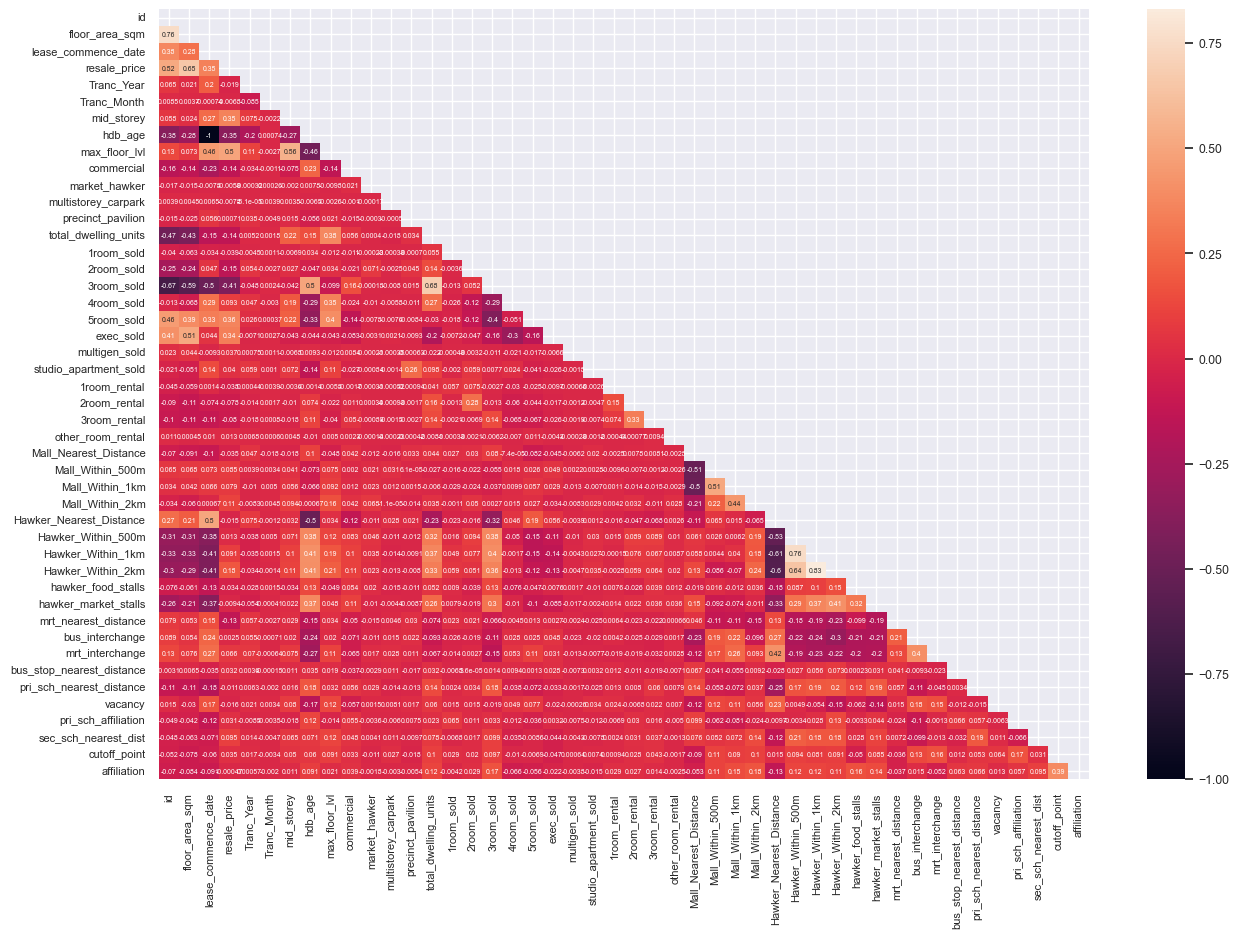

In [239]:
# Generate random data
data = df.corr(numeric_only = True)

# Create a mask to hide the upper triangle of the plot
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

fig = plt.subplots(figsize=(15,10))

# Create a correlation plot with the mask
sns.heatmap(data, mask=mask, annot=True, annot_kws={"size":5} )

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);
# Show the plot
plt.savefig('../data/output/images/corr()plot.png')
plt.show()


In [237]:
df.shape

(150634, 58)

Outliers

In [238]:
#Export data
#df.to_csv("../data/cleaned_for_modeling.csv",index=False)